# Tutorial for P4 switches Mininet


## What is Mininet
[Mininet](https://github.com/mininet/mininet) is a network emulator, or perhaps more precisely a network emulation orchestration system. It runs a collection of end-hosts, switches, routers, and links on a single Linux kernel. It uses lightweight virtualization to make a single system look like a complete network, running the same kernel, system, and user code. A Mininet host behaves just like a real machine; you can ssh into it (if you start up sshd and bridge the network to your host) and run arbitrary programs (including anything that is installed on the underlying Linux system.) The programs you run can send packets through what seems like a real Ethernet interface, with a given link speed and delay. Packets get processed by what looks like a real Ethernet switch, router, or middlebox, with a given amount of queueing. When two programs, like an iperf client and server, communicate through Mininet, the measured performance should match that of two (slower) native machines.

In short, Mininet's virtual hosts, switches, links, and controllers are the real thing – they are just created using software rather than hardware – and for the most part their behavior is similar to discrete hardware elements. It is usually possible to create a Mininet network that resembles a hardware network, or a hardware network that resembles a Mininet network, and to run the same binary code and applications on either platform.

## What is BMV2
This is the second version of the reference P4 software switch, nicknamed bmv2 (for behavioral model version 2). The software switch is written in C++17. It takes as input a JSON file generated from your P4 program by a P4 compiler and interprets it to implement the packet-processing behavior specified by that P4 program.

bmv2 is not meant to be a production-grade software switch. It is meant to be used as a tool for developing, testing and debugging P4 data planes and control plane software written for them. As such, the performance of bmv2 - in terms of throughput and latency - is significantly less than that of a production-grade software switch like Open vSwitch. For more information about the performance of bmv2, refer to this [document](https://github.com/p4lang/behavioral-model?tab=readme-ov-file#behavioral-model-bmv2).

## Lab 1 : Creating mininet topology
In this section, we will be creating a **linear topology with 2 switches and 2 hosts** with mininet

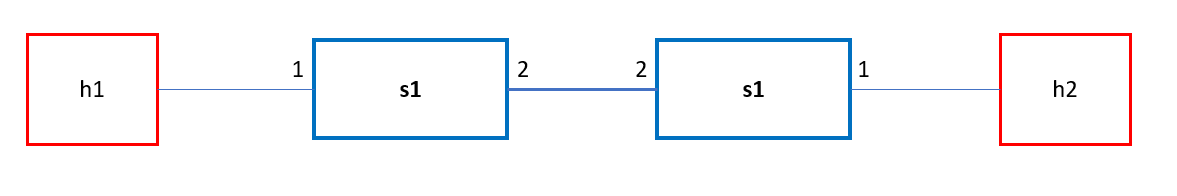

### 1.1 Create a topology in mininet

```sudo mn --custom new_bmv2.py --switch simple_switch_grpc --host onoshost --controller none --topo linear,2```

#### Sample Output
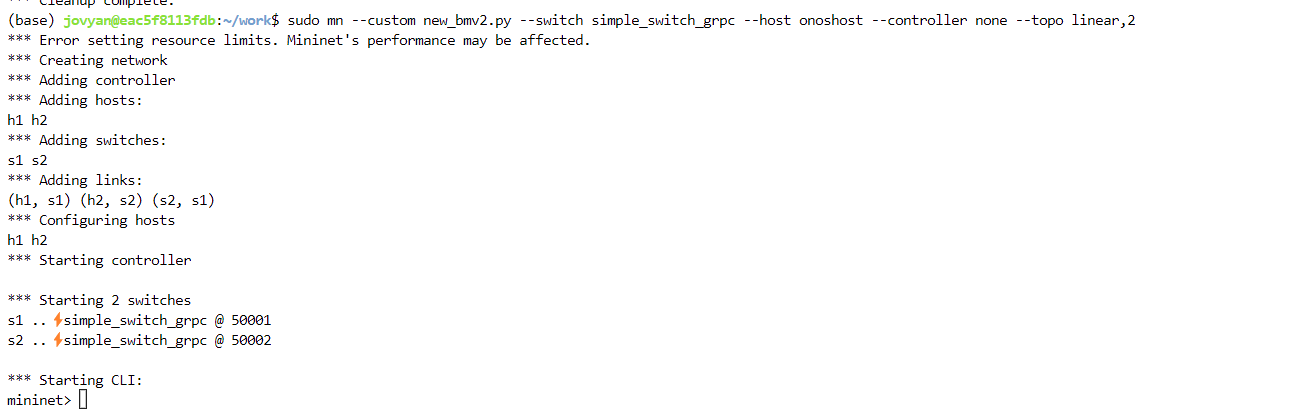

### 1.2 Display the listening port to verify that the switch spin up is listening on the port

```netstat -tulpn```

#### Sample Output
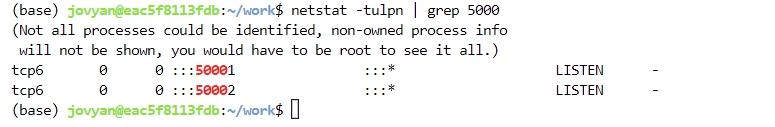

### 1.3 Check the running process

```ps aux | grep simple_switch_grpc```

#### Sample Output
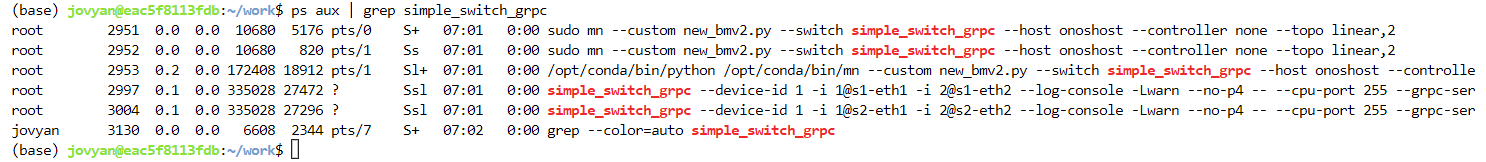

### 1.4 Query mininet information

From mininet terminal(mininet>), query the host mac address

```
Mininet> h1 ifconfig | grep ether
Mininet> h2 ifconfig | grep ether
```

Add static arp entry for the hosts

```
Mininet> h1 arp -s 10.0.0.2 xx:xx:xx:xx:xx:xx
Mininet> h2 arp -s 10.0.0.1 yy:yy:yy:yy:yy:yy
```

Query the links information
```
Mininet> links
```

#### Sample output
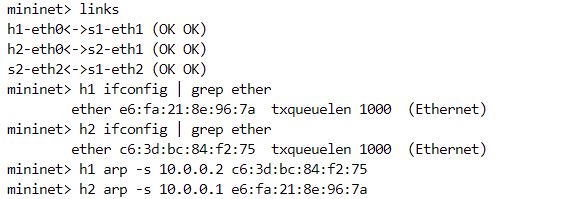


### 1.5 Using P4RuntimeShell, connect to the Switch

Open a new terminal, connect to Switch1

```connect --grpc-addr 127.0.0.1:50001 --device-id 1 --election-id 0,1 --config p4info.txt,basic.json```

Open a new terminal, connect to Switch2

```connect --grpc-addr 127.0.0.1:50002 --device-id 1 --election-id 0,1 --config p4info.txt,basic.json```

#### Sample Output
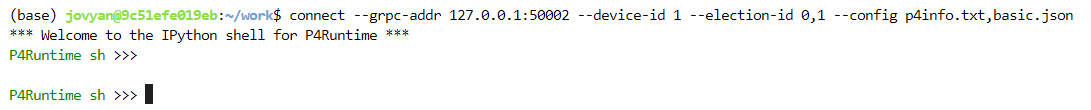

### 1.6 Insert table entry to BMV2 Switches

From Switch1 P4RuntimeShell

From Switch2 P4RuntimeShell:

#### Sample Output
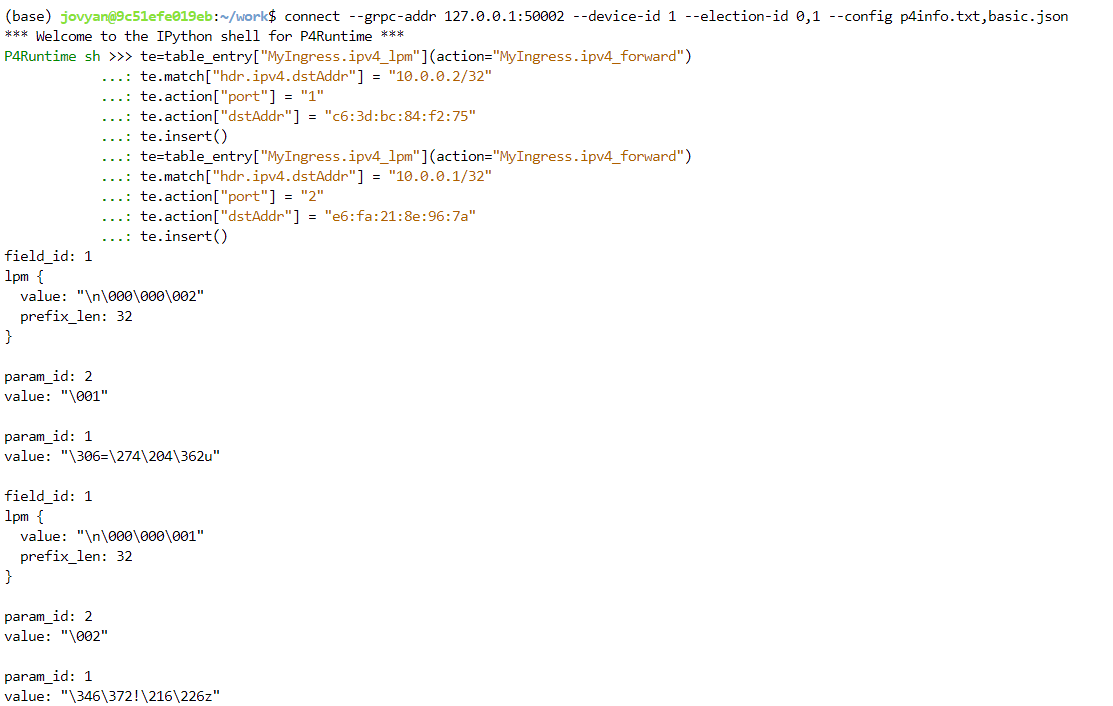

### 1.7 Verifying ping between hosts

#### From mininet> terminal, perform ping test

```
Mininet> h1 ping h2
```

#### Sample Output
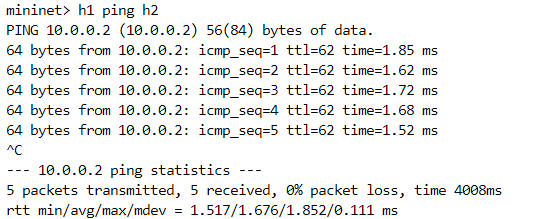